## KNN for Pendigits

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
df = pd.read_csv('./pendigits.csv',header=None)
print(df.head(10))
data = df.iloc[:,0:16]
labels = df.iloc[:,16:17]
#labels.stack()

    0    1   2    3    4    5    6    7    8   9    10  11   12   13   14  \
0   47  100  27   81   57   37   26    0    0  23   56  53  100   90   40   
1    0   89  27  100   42   75   29   45   15  15   37   0   69    2  100   
2    0   57  31   68   72   90  100  100   76  75   50  51   28   25   16   
3    0  100   7   92    5   68   19   45   86  34  100  45   74   23   67   
4    0   67  49   83  100  100   81   80   60  60   40  40   33   20   47   
5  100  100  88   99   49   74   17   47    0  16   37   0   73   16   20   
6    0  100   3   72   26   35   85   35  100  71   73  97   65   49   66   
7    0   39   2   62   11    5   63    0  100  43   89  99   36  100    0   
8   13   89  12   50   72   38   56    0    4  17    0  61   32   94  100   
9   57  100  22   72    0   31   25    0   75  13  100  50   75   87   26   

    15  16  
0   98   8  
1    6   2  
2    0   1  
3    0   4  
4    0   1  
5   20   6  
6    0   4  
7   57   0  
8  100   5  
9   85   0  


In [71]:
data.head(5)
labels.head()

labels = labels.unstack()
labels.shape

(10992,)

In [72]:
train_data,test_data,train_label,test_label = train_test_split(data,labels,test_size=0.2,random_state=16)
knn = KNeighborsClassifier(n_neighbors=9,algorithm='auto',leaf_size=15,p=2,metric='minkowski',metric_params=None,n_jobs=1)
knn.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [75]:

pred = knn.predict(test_data)
pred.shape

(2199,)

In [98]:
accuracy_comp_table = pd.DataFrame({"Predicted":pred,"Actual":test_label})
print(accuracy_comp_table.tail(5))
ver = pred == test_label

          Predicted  Actual
16 2655           8       8
   7442           5       5
   4149           3       3
   10561          9       9
   6512           6       6


In [115]:
accurcy = (sum(ver)/len(test_label))*100
print("Accurcy of this model = ",accurcy)
#np.unique(labels)

Accurcy of this model =  99.31787175989086


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

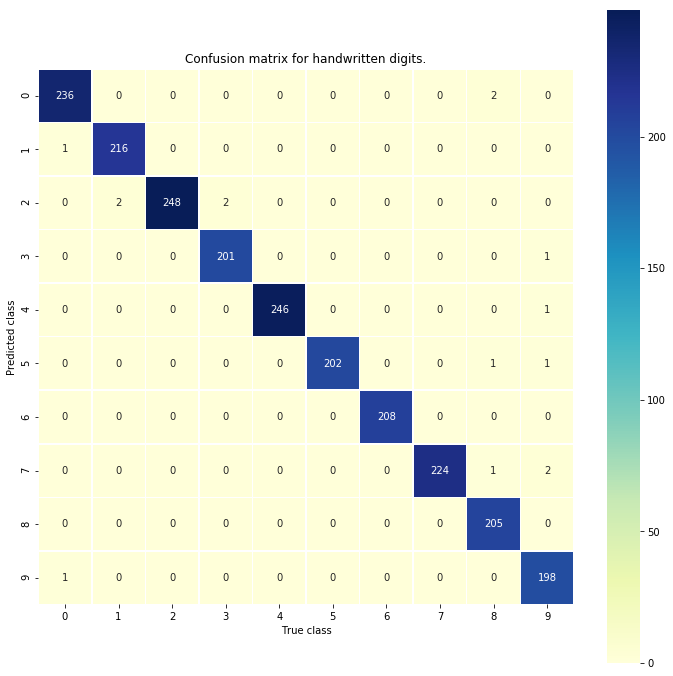

In [125]:
confusion_mat = confusion_matrix(test_label,pred)
p, ax = plt.subplots(figsize=(12,12))
ax.set_title("Confusion matrix for handwritten digits.")
sb.heatmap(confusion_mat.T,square=True,annot=True,fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=np.unique(labels),
            yticklabels=np.unique(labels),linewidths=.5, ax=ax)
plt.xlabel('True class')
plt.ylabel('Predicted class');
